In [1]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [2]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [3]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [4]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [5]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
print(x_std.mean())
print(x_std.std())

3.552713678800501e-17
1.0


In [6]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [7]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [8]:
x_std.T.dot(x_std)/(len(x_std) - 1.0)

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [9]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('eng val : \n', eig_vals)
print('eng_vecs : \n', eig_vecs)

eng val : 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eng_vecs : 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [10]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

In [11]:
projected_x = x_std.dot(eig_vecs.T[0])
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [12]:
result = pd.DataFrame(projected_x, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


/Users/dhkim/miniforge3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

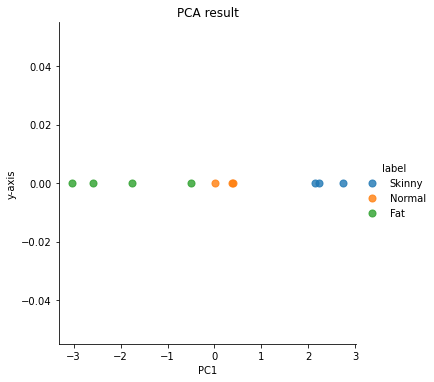

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, 
           scatter_kws={'s':50},
           hue="label")
plt.title('PCA result')

In [14]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

/Users/dhkim/miniforge3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

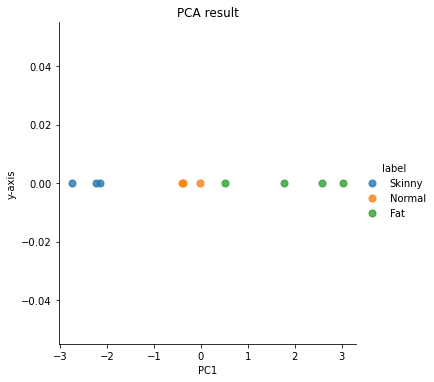

In [15]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
pca_result['y-axis'] = 0.0
pca_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=pca_result, fit_reg=False, 
           scatter_kws={'s':50},
           hue="label")
plt.title('PCA result')

In [16]:
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

/Users/dhkim/miniforge3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


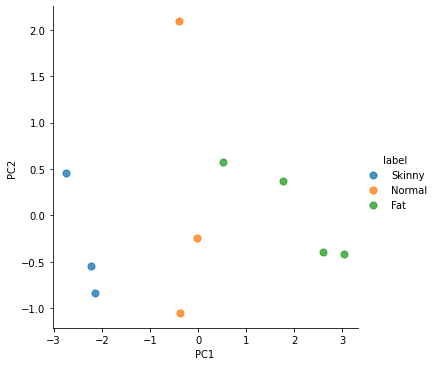

In [17]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2'])
pca_result['label'] = Y

sns.lmplot('PC1', 'PC2', data=pca_result, fit_reg=False,
           scatter_kws = {"s":50},
           hue='label')



# SVD

In [18]:
import numpy as np

A = np.array([[1,0,0,0,2],
            [0,0,3,0,0],
            [0,0,0,0,0],
            [0,2,0,0,0]])

In [19]:

U, s, VT = np.linalg.svd(A)
print('U : \n {}'.format(U))
print('s : \n {}'.format(s))
print('vt : \n {}'.format(VT))

U : 
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
s : 
 [3.         2.23606798 2.         0.        ]
vt : 
 [[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


(824, 565)


Text(0.5, 1.0, 'original image(61.12kb)')

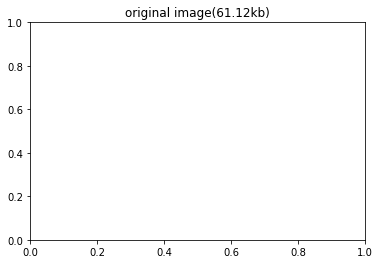

In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt

path = "../img/netanya_coast.jpg"

img = Image.open(path)
# 컬러는 없이 그냥 Gray scale 로 하면 2차원

s =float(os.path.getsize(path))/1000

print(img.size)
plt.title("original image({:.2f}kb)".format(s))


In [21]:
#svg 를 활용하여 압축
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)

imgmat.shape

(465560,)

In [22]:
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
imgmat.shape


(565, 824)

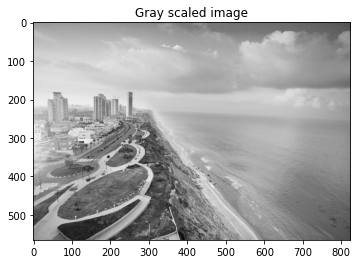

In [23]:
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title("Gray scaled image")
plt.show()


In [24]:
U, S, Vt = np.linalg.svd(imgmat)

S.shape


(565,)

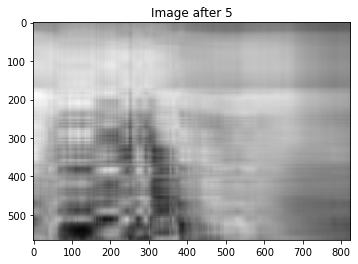

<PIL.Image.Image image mode=L size=824x565 at 0x7FE6DAC464C0>


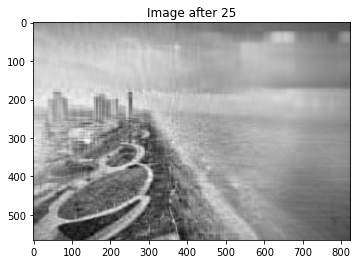

<PIL.Image.Image image mode=L size=824x565 at 0x7FE6DA828BE0>


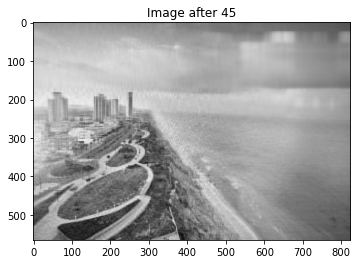

<PIL.Image.Image image mode=L size=824x565 at 0x7FE6DBD90160>


In [25]:
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i] * np.diag(S[:i])*np.matrix(Vt[:i, :]))
    plt.imshow(cmpimg, cmap='gray')
    title = "Image after {}".format(i)
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))
    print(result)

In [26]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [27]:
doc_ls = ["바나나 사과 포도 포도 짜장면",
         "사과 포도",
         "포도 바나나",
         "짜장면 짬뽕 탕수육",
         "볶음밥 탕수육",
         "짜장면 짬뽕",
         "라면 스시",
         "스시 짜장면",
         "가츠동 스시 소바",
         "된장찌개 김치찌개 김치",
         "김치 된장 짜장면",
         "비빔밥 김치"
         ]



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [29]:
len(doc_ls)

12

In [30]:
U.shape

(12, 4)

In [31]:
Vt.shape

(4, 16)

In [32]:
vocab = tfidf_vect.get_feature_names()
print(vocab)
n = 3
for i, topic in enumerate(Vt):
    print("Topic {}:".format(i), [ (vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

['가츠동', '김치', '김치찌개', '된장', '된장찌개', '라면', '바나나', '볶음밥', '비빔밥', '사과', '소바', '스시', '짜장면', '짬뽕', '탕수육', '포도']
Topic 0: [('포도', 0.583), ('짜장면', 0.499), ('바나나', 0.33)]
Topic 1: [('짜장면', 0.44), ('짬뽕', 0.391), ('스시', 0.315)]
Topic 2: [('스시', 0.703), ('라면', 0.353), ('가츠동', 0.253)]
Topic 3: [('김치', 0.682), ('비빔밥', 0.373), ('김치찌개', 0.272)]


In [33]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors):
    def consine_similarity(a, b):
        return dot(a, b)/(norm(a)*norm(b))

    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))

    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = consine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

In [34]:
word_vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, label):
    mask =np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rc('font', family='AppleGothic')
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                     annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")

In [36]:
U.shape

(12, 4)

<ipython-input-35-723d16bef75f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
/Users/dhkim/miniforge3/envs/nlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dhkim/miniforge3/envs/nlp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


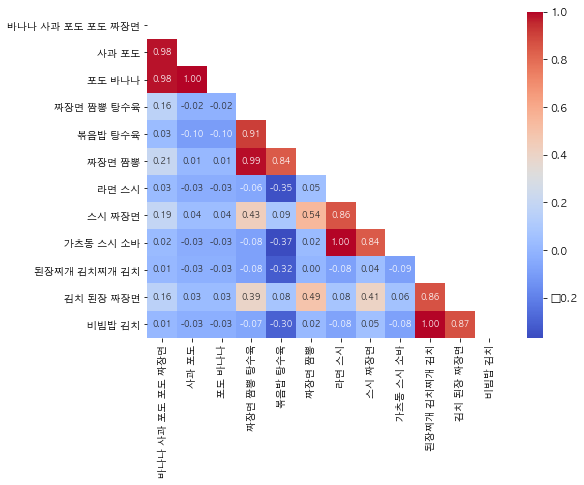

In [37]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize_similarity(doc_similarity_matrix, doc_ls)

In [38]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(T[:,0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')